# Exploring Drowsiness Patterns in Wearable Device Data 
### Background 
You are a data scientist working for a wearable technology company that produces smartwatches
with vital signs sensors. These sensors monitor heart rate and PPG (Photoplethysmography)
signals, which include variations in green, red, and infrared light. One of the key features of your
company's smartwatch is its ability to detect and alert users to potential drowsiness based on their
physiological data.
### Objective:
Your task is to perform an Exploratory Data Analysis (EDA) on a dataset collected from these
smartwatches. The dataset includes various physiological parameters along with a 'drowsiness'
label, which indicates the level of sleepiness based on an adapted Karolinska Sleepiness Scale
(KSS).
### Dataset Details:
Columns:
- heartRate: Heart rate readings from the smartwatch sensors.
- ppgGreen, ppgRed, ppgIR: PPG (Photoplethysmography) sensor readings in green,
red, and infrared wavelengths respectively.
- drowsiness: Label indicating the level of drowsiness based on an adapted Karolinska
Sleepiness Scale (KSS). Values range from 0.0 to 2.0, where 0.0 represents
alertness and 2.0 represents significant drowsiness.

Rows:
- Each row represents a timestamped measurement from a smartwatch wearer

Links: 

* Data Source: https://www.kaggle.com/datasets/vitoraugustx/drowsiness-dataset 
* Data Set: http://localhost:8888/lab/tree/DataScience/drowsiness_dataset.csv

### Importing libraries and dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/proma/DataScience/drowsiness_dataset.csv')

### Finding missing values

In [7]:
data.isna().sum()

heartRate     0
ppgGreen      0
ppgRed        0
ppgIR         0
drowsiness    0
dtype: int64

In [10]:
data.isnull().sum()

heartRate     0
ppgGreen      0
ppgRed        0
ppgIR         0
drowsiness    0
dtype: int64

### Statistical Summary

#### Segmenting data by period 

In [3]:
num_periods = 4
period_size = len(data) // num_periods

period_labels = ['Morning', 'Afternoon', 'Evening', 'Night']
data['period'] = pd.cut(data.index, bins = num_periods, labels = period_labels)

print(data['period'].value_counts())

morning_data = data[data['period'] == 'Morning']
afternoon_data = data[data['period'] == 'Afternoon']
evening_data = data[data['period'] == 'Evening']
night_data = data[data['period'] == 'Night']

period
Morning      1222565
Afternoon    1222565
Evening      1222565
Night        1222565
Name: count, dtype: int64


#### Data Information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890260 entries, 0 to 4890259
Data columns (total 6 columns):
 #   Column      Dtype   
---  ------      -----   
 0   heartRate   float64 
 1   ppgGreen    float64 
 2   ppgRed      float64 
 3   ppgIR       float64 
 4   drowsiness  float64 
 5   period      category
dtypes: category(1), float64(5)
memory usage: 191.2 MB


In [12]:
data.describe(include = 'all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
heartRate,4890260.0,NaN,NaN,NaN,78.142446,12.966349,50.0,68.0,78.0,87.0,119.0
ppgGreen,4890260.0,NaN,NaN,NaN,2073589.298398,441877.278776,589758.0,1780621.0,2044657.5,2333117.0,3530798.0
ppgRed,4890260.0,NaN,NaN,NaN,5643652.756482,390962.637695,4441989.0,5368700.0,5646039.0,5927128.0,6842637.0
ppgIR,4890260.0,NaN,NaN,NaN,5728190.956125,431305.164851,4409976.0,5402542.0,5818748.0,6016016.0,7061799.0
drowsiness,4890260.0,NaN,NaN,NaN,0.859359,0.837029,0.0,0.0,1.0,2.0,2.0
period,4890260,4,Morning,1222565,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
morning_data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
heartRate,1222565.0,NaN,NaN,NaN,79.357522,14.177073,50.0,68.0,79.0,90.0,119.0
ppgGreen,1222565.0,NaN,NaN,NaN,2020622.24224,374996.384522,989696.0,1743621.0,1962317.0,2285779.0,3519352.0
ppgRed,1222565.0,NaN,NaN,NaN,5673806.594943,453030.355904,4447901.0,5274795.0,5791778.0,5996479.0,6842637.0
ppgIR,1222565.0,NaN,NaN,NaN,5678297.589027,451840.343772,4631501.0,5339993.0,5799691.0,5977432.0,7061153.0
drowsiness,1222565.0,NaN,NaN,NaN,0.740197,0.862457,0.0,0.0,0.0,2.0,2.0
period,1222565,1,Morning,1222565,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
afternoon_data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
heartRate,1222565.0,NaN,NaN,NaN,76.927371,11.502625,50.0,67.0,77.0,85.0,119.0
ppgGreen,1222565.0,NaN,NaN,NaN,2126556.354555,494244.865923,589758.0,1858336.0,2130149.0,2357586.0,3530798.0
ppgRed,1222565.0,NaN,NaN,NaN,5613498.918022,314083.974249,4441989.0,5433339.0,5611129.0,5823341.0,6826646.0
ppgIR,1222565.0,NaN,NaN,NaN,5778084.323224,403621.260837,4409976.0,5460137.0,5834323.0,6072060.0,7061799.0
drowsiness,1222565.0,NaN,NaN,NaN,0.978521,0.793097,0.0,0.0,1.0,2.0,2.0
period,1222565,1,Afternoon,1222565,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
evening_data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
heartRate,1222565.0,NaN,NaN,NaN,79.357522,14.177073,50.0,68.0,79.0,90.0,119.0
ppgGreen,1222565.0,NaN,NaN,NaN,2020622.24224,374996.384522,989696.0,1743621.0,1962317.0,2285779.0,3519352.0
ppgRed,1222565.0,NaN,NaN,NaN,5673806.594943,453030.355904,4447901.0,5274795.0,5791778.0,5996479.0,6842637.0
ppgIR,1222565.0,NaN,NaN,NaN,5678297.589027,451840.343772,4631501.0,5339993.0,5799691.0,5977432.0,7061153.0
drowsiness,1222565.0,NaN,NaN,NaN,0.740197,0.862457,0.0,0.0,0.0,2.0,2.0
period,1222565,1,Evening,1222565,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
night_data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
heartRate,1222565.0,NaN,NaN,NaN,76.927371,11.502625,50.0,67.0,77.0,85.0,119.0
ppgGreen,1222565.0,NaN,NaN,NaN,2126556.354555,494244.865923,589758.0,1858336.0,2130149.0,2357586.0,3530798.0
ppgRed,1222565.0,NaN,NaN,NaN,5613498.918022,314083.974249,4441989.0,5433339.0,5611129.0,5823341.0,6826646.0
ppgIR,1222565.0,NaN,NaN,NaN,5778084.323224,403621.260837,4409976.0,5460137.0,5834323.0,6072060.0,7061799.0
drowsiness,1222565.0,NaN,NaN,NaN,0.978521,0.793097,0.0,0.0,1.0,2.0,2.0
period,1222565,1,Night,1222565,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Histograms 

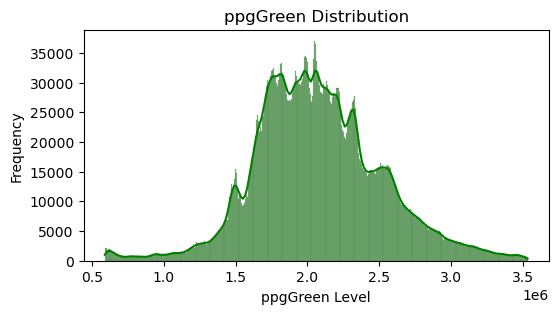

In [9]:
plt.figure(figsize = (6,3))
sns.histplot(data['ppgGreen'], kde = True, color = 'green')
plt.title('ppgGreen Distribution')
plt.xlabel('ppgGreen Level')
plt.ylabel('Frequency')
plt.show()

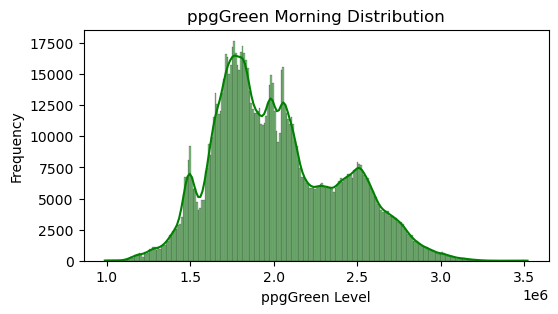

In [114]:
plt.figure(figsize = (6,3))
sns.histplot(morning_data['ppgGreen'], kde = True, color = 'green')
plt.title('ppgGreen Morning Distribution')
plt.xlabel('ppgGreen Level')
plt.ylabel('Frequency')
plt.show()

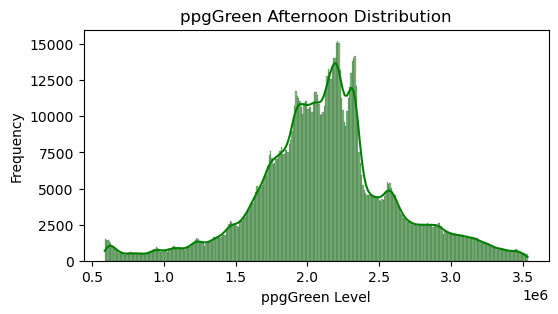

In [115]:
plt.figure(figsize = (6,3))
sns.histplot(afternoon_data['ppgGreen'], kde = True, color = 'green')
plt.title('ppgGreen Afternoon Distribution')
plt.xlabel('ppgGreen Level')
plt.ylabel('Frequency')
plt.show()

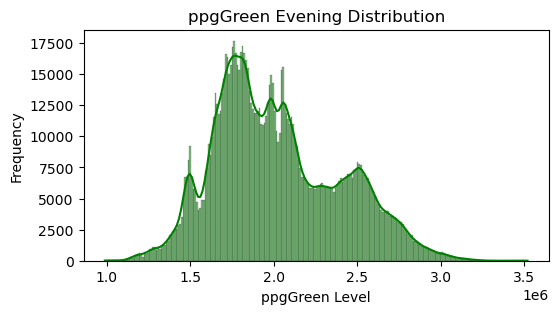

In [116]:
plt.figure(figsize = (6,3))
sns.histplot(evening_data['ppgGreen'], kde = True, color = 'green')
plt.title('ppgGreen Evening Distribution')
plt.xlabel('ppgGreen Level')
plt.ylabel('Frequency')
plt.show()

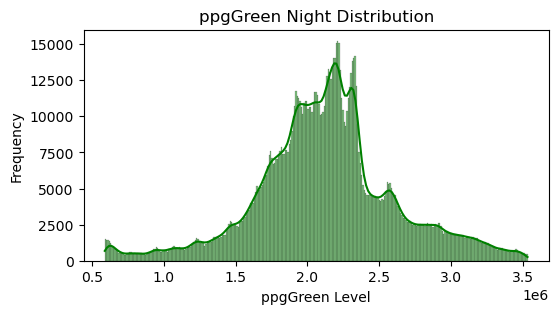

In [119]:
plt.figure(figsize = (6,3))
sns.histplot(night_data['ppgGreen'], kde = True, color = 'green')
plt.title('ppgGreen Night Distribution')
plt.xlabel('ppgGreen Level')
plt.ylabel('Frequency')
plt.show()

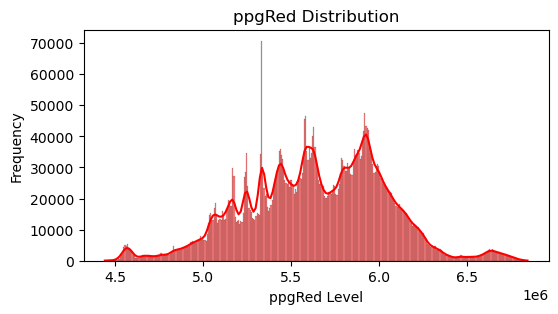

In [11]:
plt.figure(figsize = (6,3))
sns.histplot(data['ppgRed'], kde = True, color = 'red')
plt.title('ppgRed Distribution')
plt.xlabel('ppgRed Level')
plt.ylabel('Frequency')
plt.show()

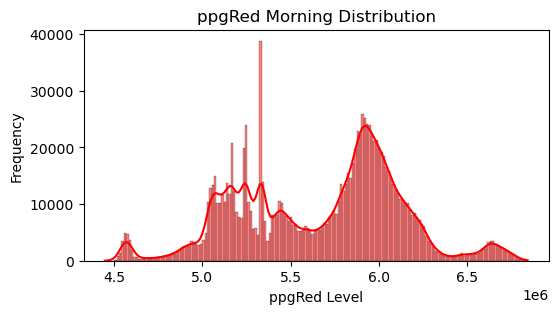

In [125]:
plt.figure(figsize = (6,3))
sns.histplot(morning_data['ppgRed'], kde = True, color = 'red')
plt.title('ppgRed Morning Distribution')
plt.xlabel('ppgRed Level')
plt.ylabel('Frequency')
plt.show()

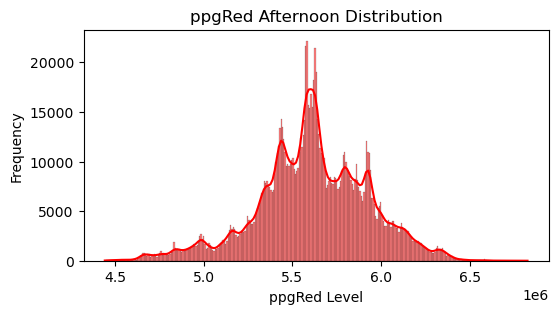

In [123]:
plt.figure(figsize = (6,3))
sns.histplot(afternoon_data['ppgRed'], kde = True, color = 'red')
plt.title('ppgRed Afternoon Distribution')
plt.xlabel('ppgRed Level')
plt.ylabel('Frequency')
plt.show()

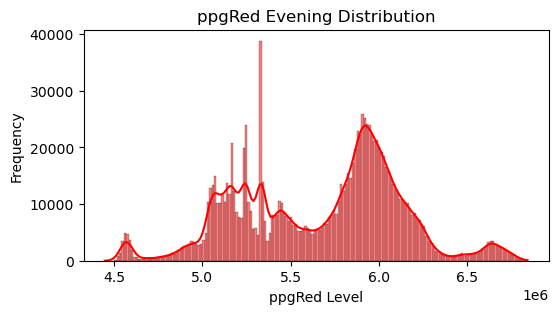

In [128]:
plt.figure(figsize = (6,3))
sns.histplot(evening_data['ppgRed'], kde = True, color = 'red')
plt.title('ppgRed Evening Distribution')
plt.xlabel('ppgRed Level')
plt.ylabel('Frequency')
plt.show()

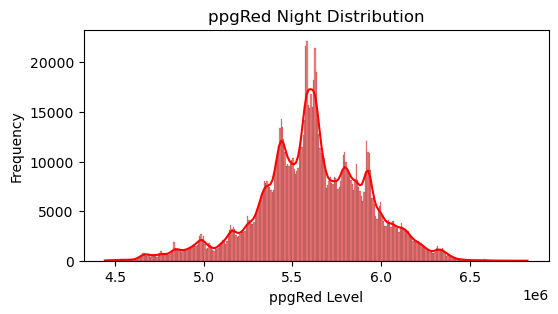

In [129]:
plt.figure(figsize = (6,3))
sns.histplot(night_data['ppgRed'], kde = True, color = 'red')
plt.title('ppgRed Night Distribution')
plt.xlabel('ppgRed Level')
plt.ylabel('Frequency')
plt.show()

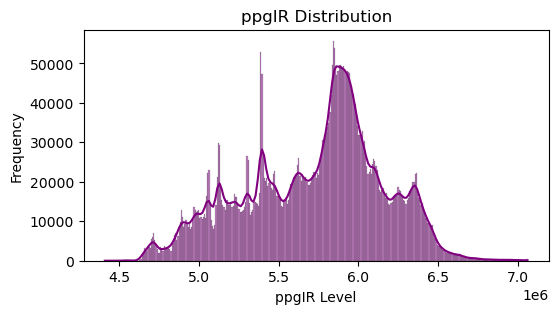

In [12]:
plt.figure(figsize = (6,3))
sns.histplot(data['ppgIR'], kde = True, color = 'purple')
plt.title('ppgIR Distribution')
plt.xlabel('ppgIR Level')
plt.ylabel('Frequency')
plt.show()

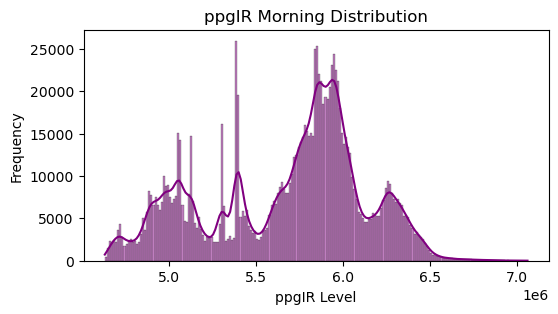

In [106]:
plt.figure(figsize = (6,3))
sns.histplot(morning_data['ppgIR'], kde = True, color = 'purple')
plt.title('ppgIR Morning Distribution')
plt.xlabel('ppgIR Level')
plt.ylabel('Frequency')
plt.show()

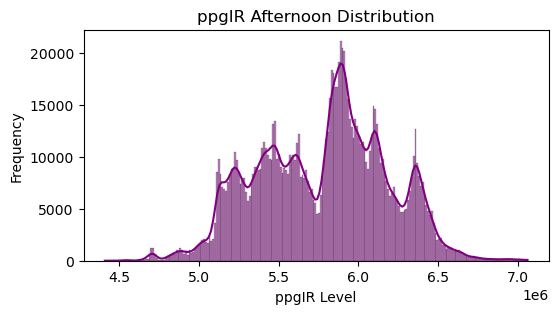

In [107]:
plt.figure(figsize = (6,3))
sns.histplot(afternoon_data['ppgIR'], kde = True, color = 'purple')
plt.title('ppgIR Afternoon Distribution')
plt.xlabel('ppgIR Level')
plt.ylabel('Frequency')
plt.show()

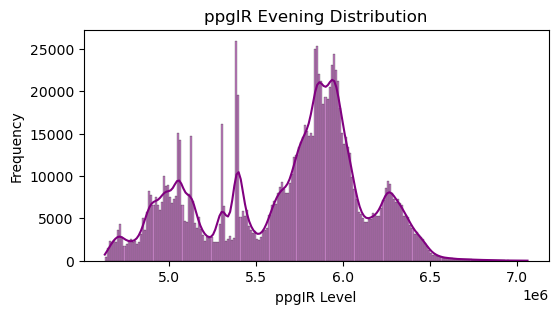

In [108]:
plt.figure(figsize = (6,3))
sns.histplot(evening_data['ppgIR'], kde = True, color = 'purple')
plt.title('ppgIR Evening Distribution')
plt.xlabel('ppgIR Level')
plt.ylabel('Frequency')
plt.show()

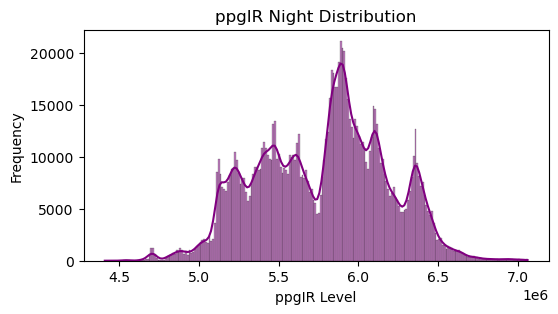

In [109]:
plt.figure(figsize = (6,3))
sns.histplot(night_data['ppgIR'], kde = True, color = 'purple')
plt.title('ppgIR Night Distribution')
plt.xlabel('ppgIR Level')
plt.ylabel('Frequency')
plt.show()

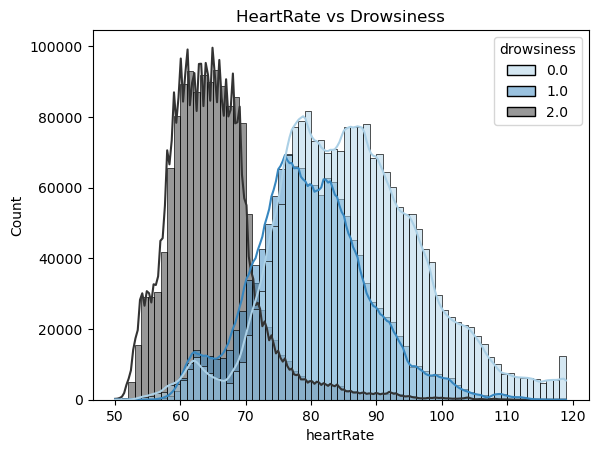

In [62]:
sns.histplot(data = data, x = 'heartRate', kde = True, hue = 'drowsiness', 
             palette = 'Blues_d', binwidth = 1)
plt.title('HeartRate vs Drowsiness')
plt.show()

In [ ]:
sns.histplot(data = data, x = 'ppgGreen', kde = True, hue = 'heartRate', 
             palette = 'Blues_d', binwidth = 1)
plt.title('HeartRate vs Drowsiness')
plt.show()

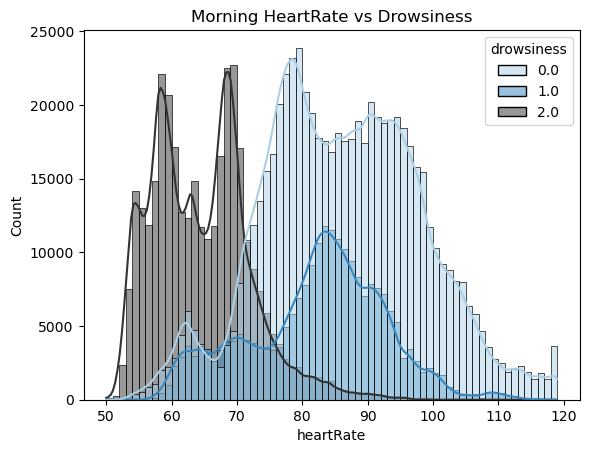

In [60]:
sns.histplot(data = morning_data, x = 'heartRate', kde = True, hue = 'drowsiness', 
             palette = 'Blues_d', binwidth = 1)
plt.title('Morning HeartRate vs Drowsiness')
plt.show()

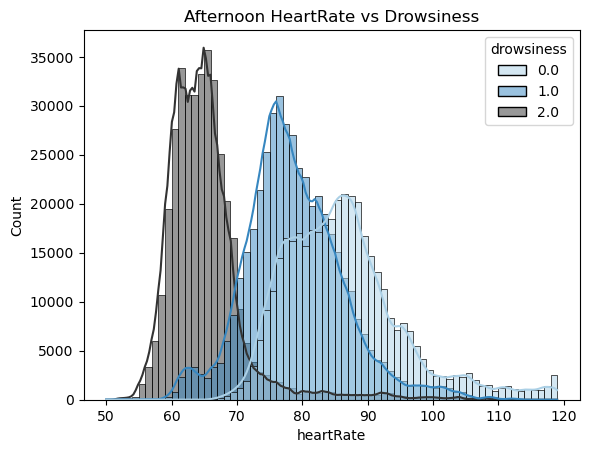

In [63]:
sns.histplot(data = afternoon_data, x = 'heartRate', kde = True, hue = 'drowsiness', 
             palette = 'Blues_d', binwidth = 1)
plt.title('Afternoon HeartRate vs Drowsiness')
plt.show()

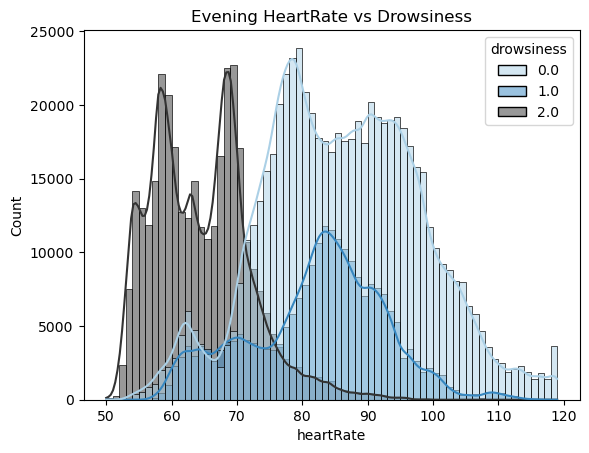

In [64]:
sns.histplot(data = evening_data, x = 'heartRate', kde = True, hue = 'drowsiness', 
             palette = 'Blues_d', binwidth = 1)
plt.title('Evening HeartRate vs Drowsiness')
plt.show()

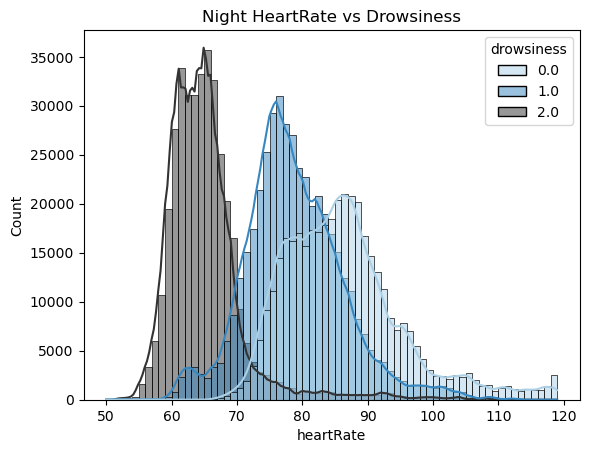

In [65]:
sns.histplot(data = night_data, x = 'heartRate', kde = True, hue = 'drowsiness', 
             palette = 'Blues_d', binwidth = 1)
plt.title('Night HeartRate vs Drowsiness')
plt.show()

### HeatMapS

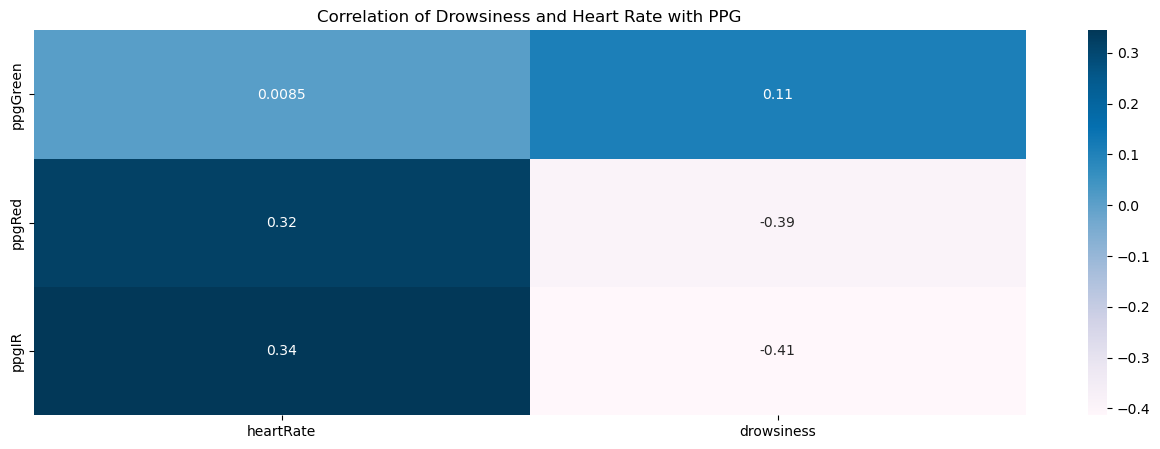

In [96]:
corr_rel = data[['ppgGreen', 'ppgRed', 'ppgIR', 'heartRate', 'drowsiness']].corr()

corr_data = corr_rel[['heartRate', 'drowsiness']].loc()[['ppgGreen', 'ppgRed', 'ppgIR']]

plt.figure(figsize = (16, 5)) 
sns.heatmap(corr_data, annot = True, cmap = 'PuBu')
plt.title('Correlation of Drowsiness and Heart Rate with PPG')
plt.show()

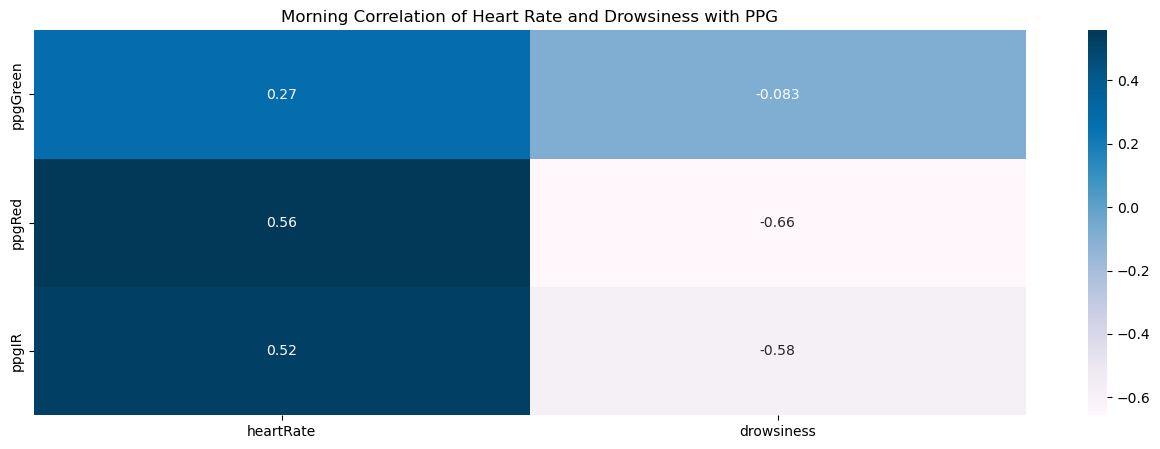

In [86]:
corr_rel = morning_data[['ppgGreen', 'ppgRed', 'ppgIR', 'heartRate', 'drowsiness']].corr()

corr_data = corr_rel[['heartRate', 'drowsiness']].loc()[['ppgGreen', 'ppgRed', 'ppgIR']]

plt.figure(figsize = (16, 5)) 
sns.heatmap(corr_data, annot = True, cmap = 'PuBu')
plt.title('Morning Correlation of Heart Rate and Drowsiness with PPG')
plt.show()

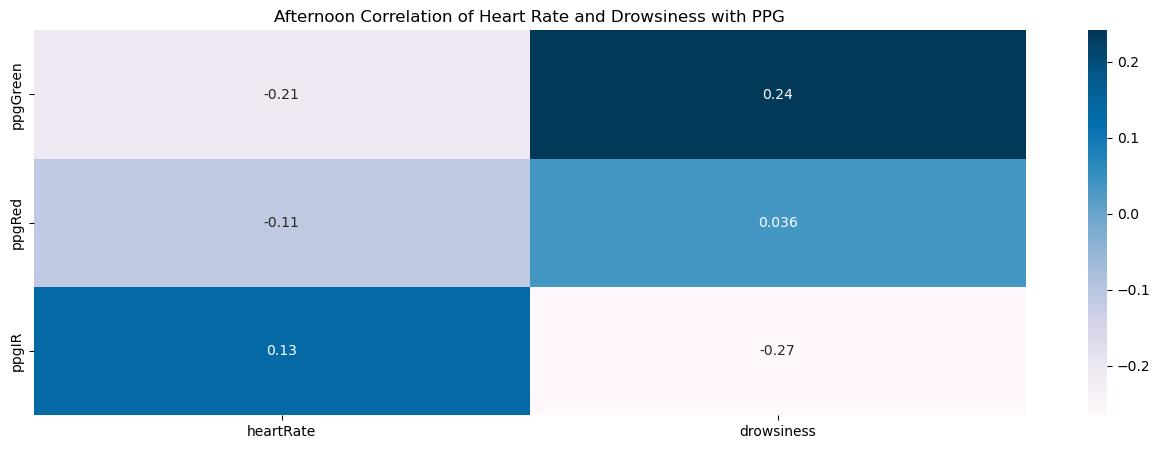

In [88]:
corr_rel = afternoon_data[['ppgGreen', 'ppgRed', 'ppgIR', 'heartRate', 'drowsiness']].corr()

corr_data = corr_rel[['heartRate', 'drowsiness']].loc()[['ppgGreen', 'ppgRed', 'ppgIR']]

plt.figure(figsize = (16, 5)) 
sns.heatmap(corr_data, annot = True, cmap = 'PuBu')
plt.title('Afternoon Correlation of Heart Rate and Drowsiness with PPG')
plt.show()

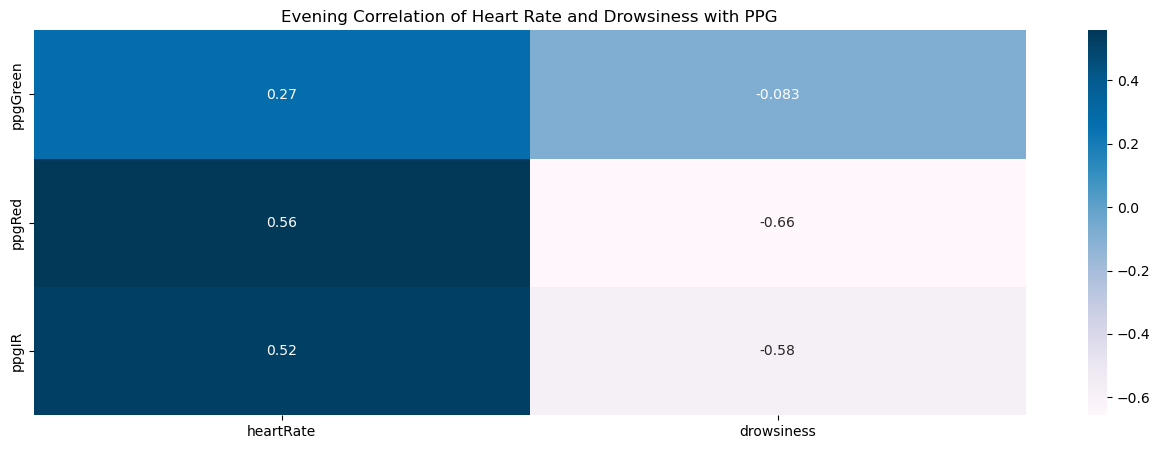

In [90]:
corr_rel = evening_data[['ppgGreen', 'ppgRed', 'ppgIR', 'heartRate', 'drowsiness']].corr()

corr_data = corr_rel[['heartRate', 'drowsiness']].loc()[['ppgGreen', 'ppgRed', 'ppgIR']]

plt.figure(figsize = (16, 5)) 
sns.heatmap(corr_data, annot = True, cmap = 'PuBu')
plt.title('Evening Correlation of Heart Rate and Drowsiness with PPG')
plt.show()

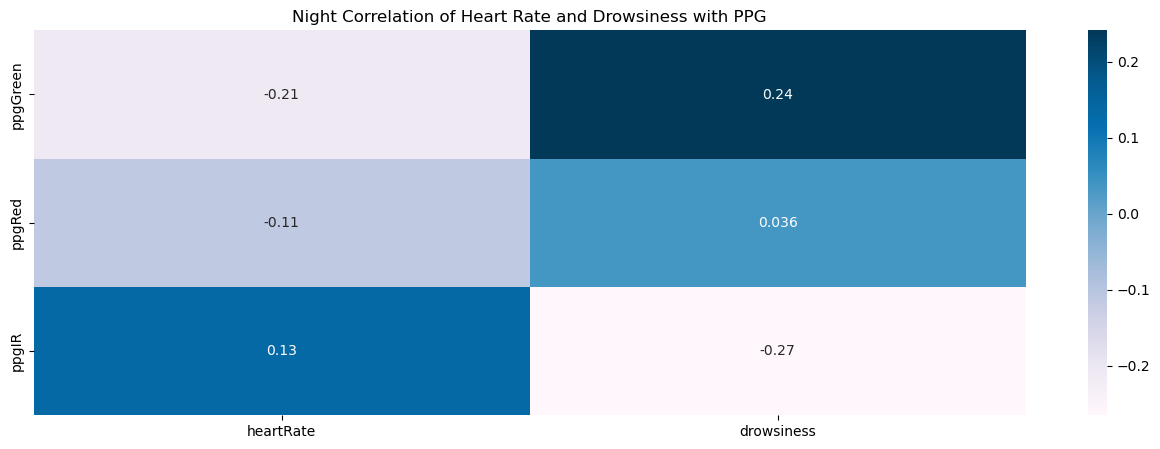

In [92]:
corr_rel = night_data[['ppgGreen', 'ppgRed', 'ppgIR', 'heartRate', 'drowsiness']].corr()

corr_data = corr_rel[['heartRate', 'drowsiness']].loc()[['ppgGreen', 'ppgRed', 'ppgIR']]

plt.figure(figsize = (16, 5)) 
sns.heatmap(corr_data, annot = True, cmap = 'PuBu')
plt.title('Night Correlation of Heart Rate and Drowsiness with PPG')
plt.show()

### Scatter Plots

Correlation between drowsiness and heart rate (Morning): -0.6319114762754598
Correlation between drowsiness and PPG Green (Morning): -0.08278873014767009
Correlation between drowsiness and PPG Red (Morning): -0.6565096863047241
Correlation between drowsiness and PPG IR (Morning): -0.5784903897390494


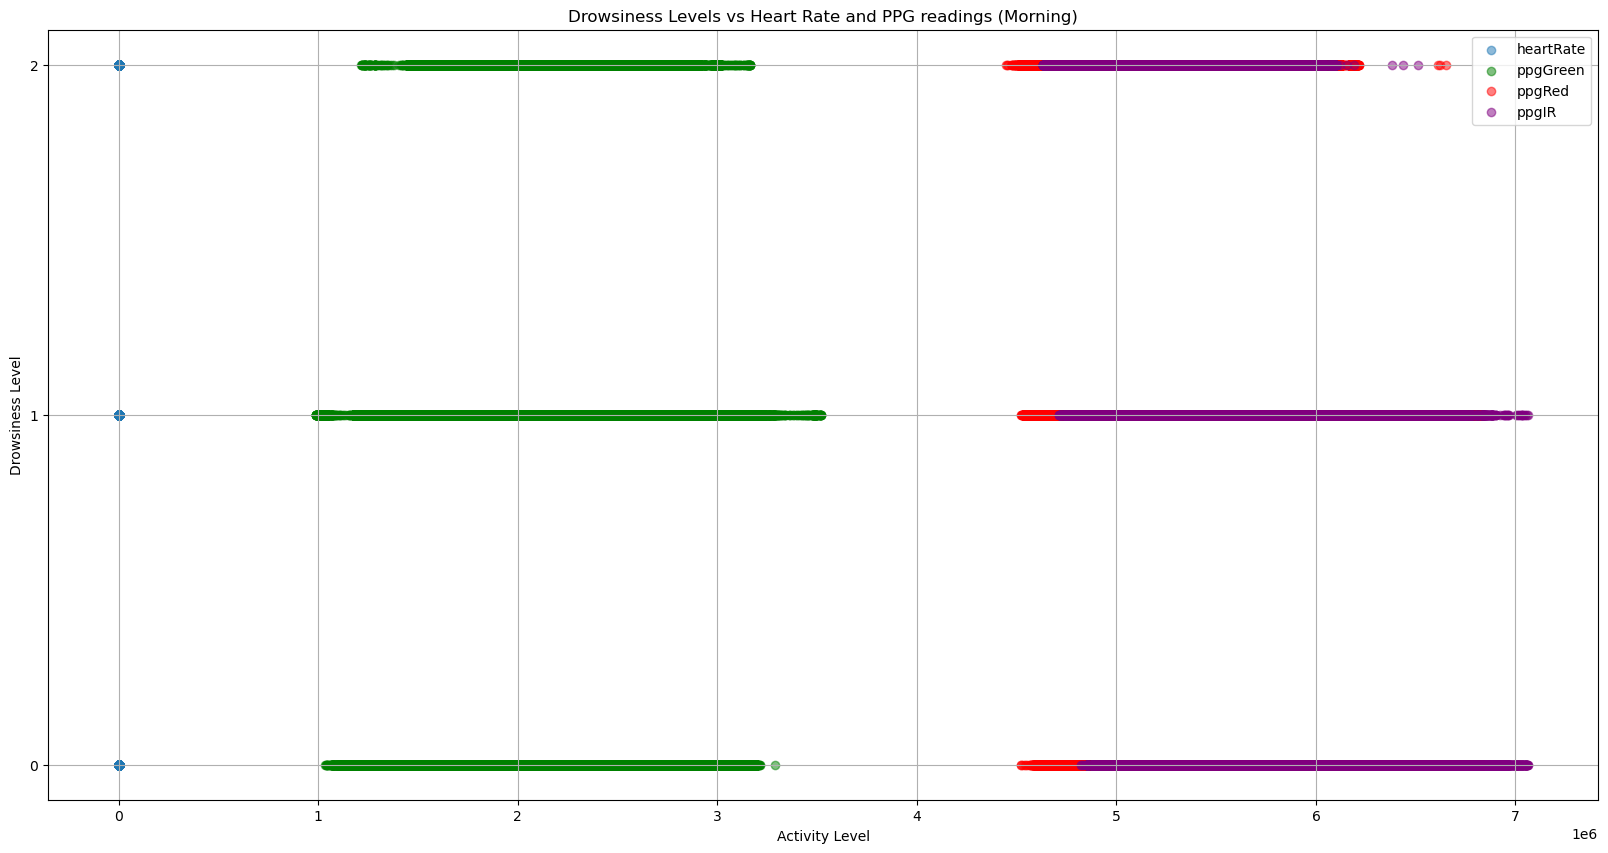

In [32]:
def calculate_and_plot_correlations(data, morning_data):
    correlation_heartrate = data['drowsiness'].corr(data['heartRate'])
    correlation_ppgGreen = data['drowsiness'].corr(data['ppgGreen'])
    correlation_ppgRed = data['drowsiness'].corr(data['ppgRed'])
    correlation_ppgIR = data['drowsiness'].corr(data['ppgIR'])

    print(f'Correlation between drowsiness and heart rate ({morning_data}): {correlation_heartrate}')
    print(f'Correlation between drowsiness and PPG Green ({morning_data}): {correlation_ppgGreen}')
    print(f'Correlation between drowsiness and PPG Red ({morning_data}): {correlation_ppgRed}')
    print(f'Correlation between drowsiness and PPG IR ({morning_data}): {correlation_ppgIR}')

    plt.figure(figsize = (20,10))
    plt.scatter(data['heartRate'], data['drowsiness'], alpha = 0.5, label = 'heartRate')
    plt.scatter(data['ppgGreen'], data['drowsiness'], alpha = 0.5, label = 'ppgGreen', color = 'green')
    plt.scatter(data['ppgRed'], data['drowsiness'], alpha = 0.5, label = 'ppgRed', color = 'red')
    plt.scatter(data['ppgIR'], data['drowsiness'], alpha = 0.5, label = 'ppgIR', color = 'purple')
    plt.title(f'Drowsiness Levels vs Heart Rate and PPG readings ({morning_data})')
    plt.yticks(np.arange(0, 3, step=1))
    plt.xlabel('Activity Level')
    plt.ylabel('Drowsiness Level')
    plt.legend(bbox_to_anchor = (1, 1), loc = 'upper right')
    plt.grid()
    plt.show()

calculate_and_plot_correlations(morning_data, 'Morning')

Correlation between drowsiness and heart rate (Afternoon): -0.7295576553745048
Correlation between drowsiness and PPG Green (Afternoon): 0.2414021220021895
Correlation between drowsiness and PPG Red (Afternoon): 0.03613894088399899
Correlation between drowsiness and PPG IR (Afternoon): -0.2655153229308318


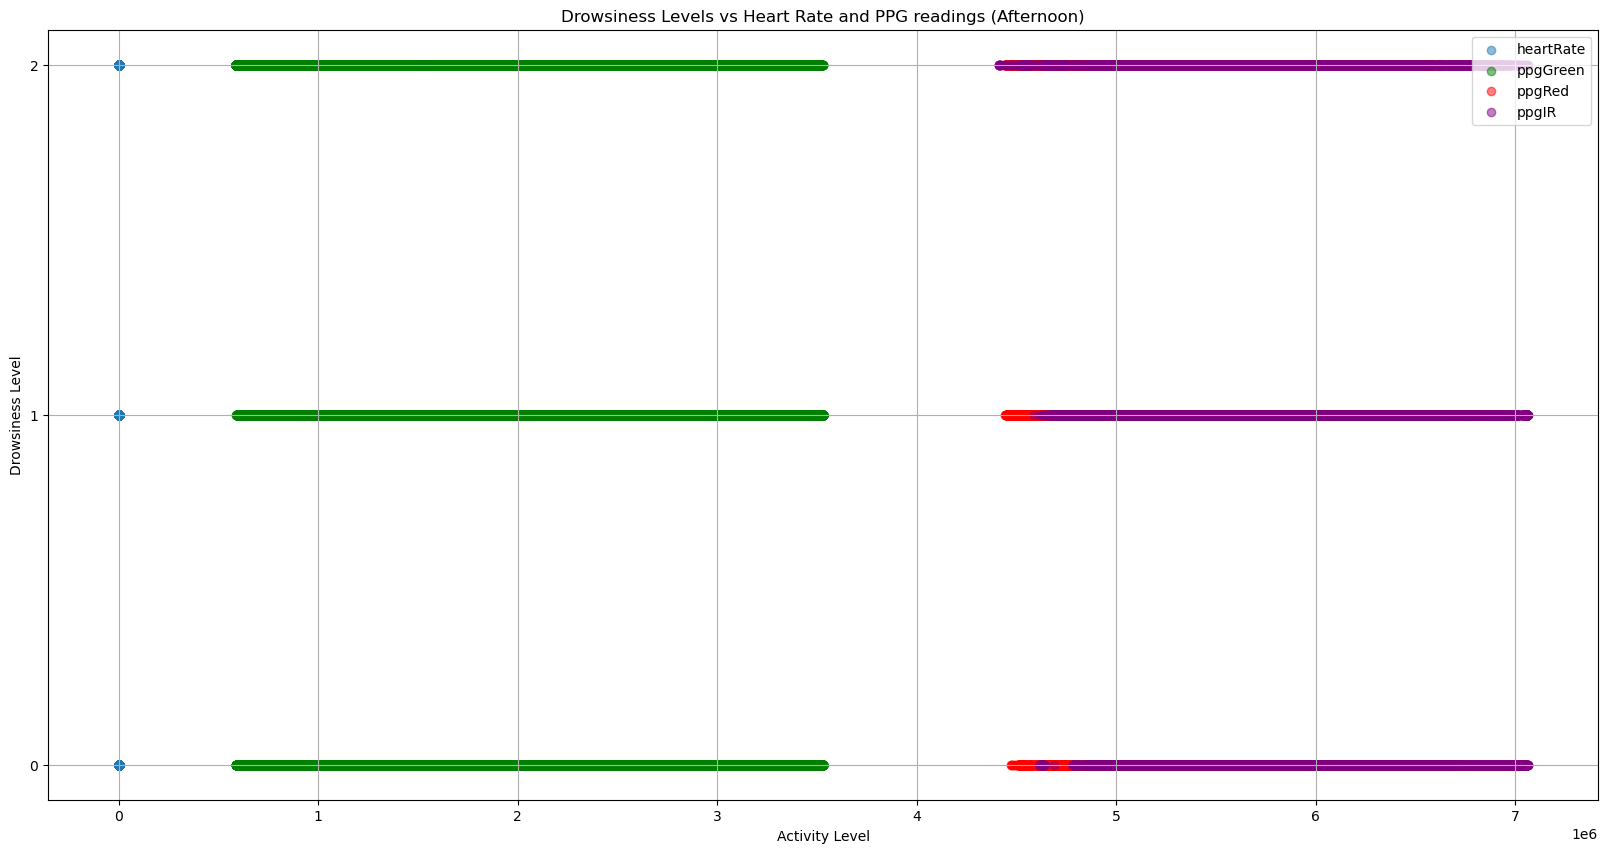

In [34]:
def calculate_and_plot_correlations(data, afternoon_data):
    correlation_heartrate = data['drowsiness'].corr(data['heartRate'])
    correlation_ppgGreen = data['drowsiness'].corr(data['ppgGreen'])
    correlation_ppgRed = data['drowsiness'].corr(data['ppgRed'])
    correlation_ppgIR = data['drowsiness'].corr(data['ppgIR'])

    print(f'Correlation between drowsiness and heart rate ({afternoon_data}): {correlation_heartrate}')
    print(f'Correlation between drowsiness and PPG Green ({afternoon_data}): {correlation_ppgGreen}')
    print(f'Correlation between drowsiness and PPG Red ({afternoon_data}): {correlation_ppgRed}')
    print(f'Correlation between drowsiness and PPG IR ({afternoon_data}): {correlation_ppgIR}')

    plt.figure(figsize = (20,10))
    plt.scatter(data['heartRate'], data['drowsiness'], alpha = 0.5, label = 'heartRate')
    plt.scatter(data['ppgGreen'], data['drowsiness'], alpha = 0.5, label = 'ppgGreen', color = 'green')
    plt.scatter(data['ppgRed'], data['drowsiness'], alpha = 0.5, label = 'ppgRed', color = 'red')
    plt.scatter(data['ppgIR'], data['drowsiness'], alpha = 0.5, label = 'ppgIR', color = 'purple')
    plt.title(f'Drowsiness Levels vs Heart Rate and PPG readings ({afternoon_data})')
    plt.yticks(np.arange(0, 3, step=1))
    plt.xlabel('Activity Level')
    plt.ylabel('Drowsiness Level')
    plt.legend(bbox_to_anchor = (1, 1), loc = 'upper right')
    plt.grid()
    plt.show()

calculate_and_plot_correlations(afternoon_data, 'Afternoon')

Correlation between drowsiness and heart rate (Evening): -0.6319114762754598
Correlation between drowsiness and PPG Green (Evening): -0.08278873014767009
Correlation between drowsiness and PPG Red (Evening): -0.6565096863047241
Correlation between drowsiness and PPG IR (Evening): -0.5784903897390494


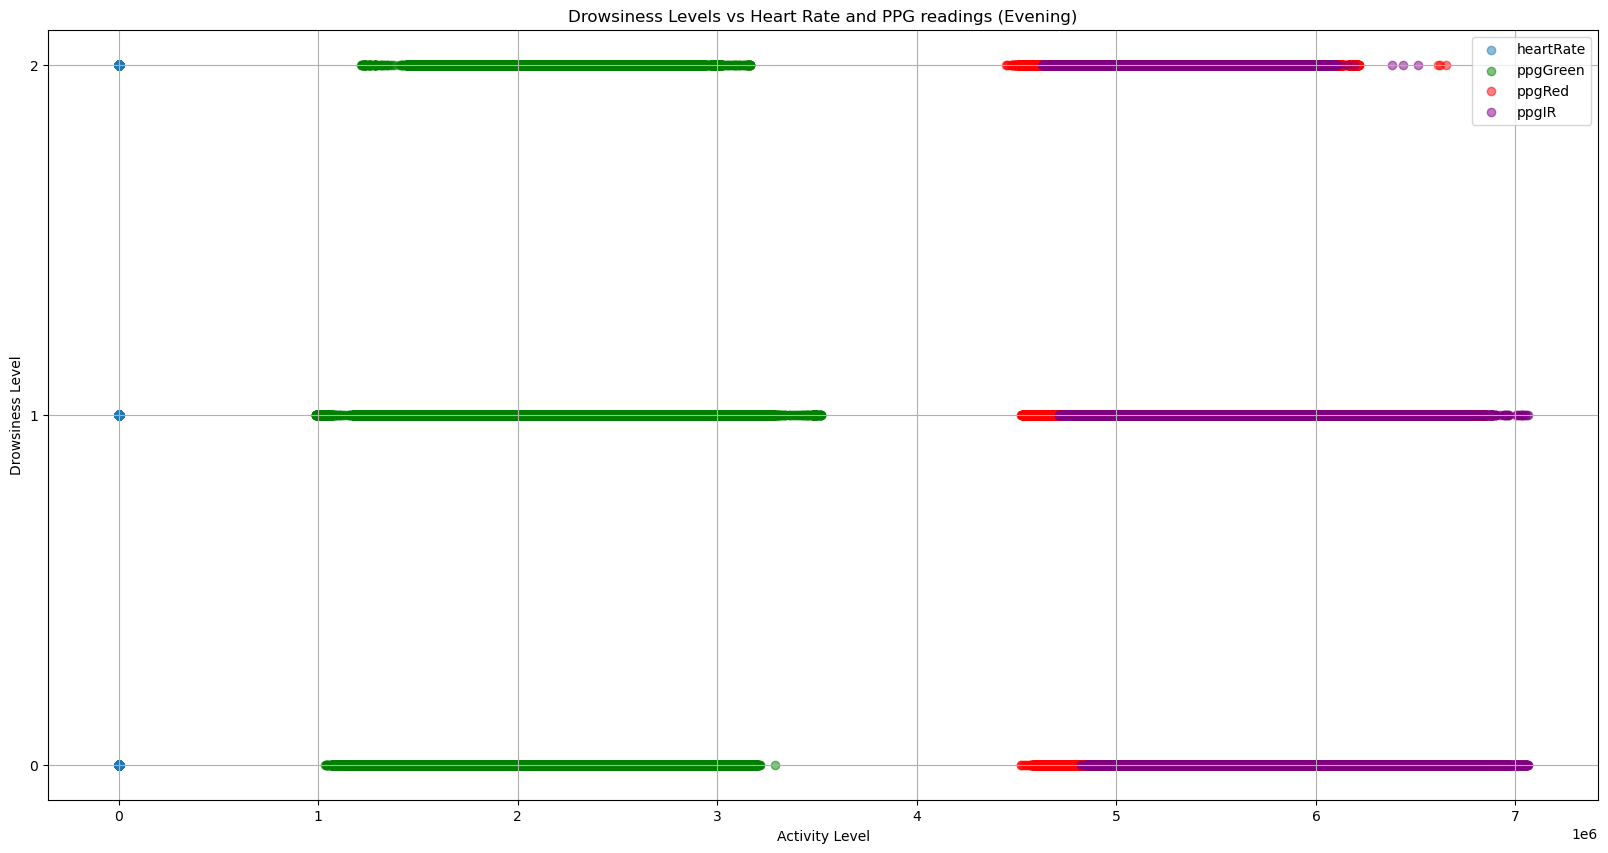

In [35]:
def calculate_and_plot_correlations(data, evening_data):
    correlation_heartrate = data['drowsiness'].corr(data['heartRate'])
    correlation_ppgGreen = data['drowsiness'].corr(data['ppgGreen'])
    correlation_ppgRed = data['drowsiness'].corr(data['ppgRed'])
    correlation_ppgIR = data['drowsiness'].corr(data['ppgIR'])

    print(f'Correlation between drowsiness and heart rate ({evening_data}): {correlation_heartrate}')
    print(f'Correlation between drowsiness and PPG Green ({evening_data}): {correlation_ppgGreen}')
    print(f'Correlation between drowsiness and PPG Red ({evening_data}): {correlation_ppgRed}')
    print(f'Correlation between drowsiness and PPG IR ({evening_data}): {correlation_ppgIR}')

    plt.figure(figsize = (20,10))
    plt.scatter(data['heartRate'], data['drowsiness'], alpha = 0.5, label = 'heartRate')
    plt.scatter(data['ppgGreen'], data['drowsiness'], alpha = 0.5, label = 'ppgGreen', color = 'green')
    plt.scatter(data['ppgRed'], data['drowsiness'], alpha = 0.5, label = 'ppgRed', color = 'red')
    plt.scatter(data['ppgIR'], data['drowsiness'], alpha = 0.5, label = 'ppgIR', color = 'purple')
    plt.title(f'Drowsiness Levels vs Heart Rate and PPG readings ({evening_data})')
    plt.yticks(np.arange(0, 3, step=1))
    plt.xlabel('Activity Level')
    plt.ylabel('Drowsiness Level')
    plt.legend(bbox_to_anchor = (1, 1), loc = 'upper right')
    plt.grid()
    plt.show()

calculate_and_plot_correlations(evening_data, 'Evening')

Correlation between drowsiness and heart rate (Night): -0.7295576553745048
Correlation between drowsiness and PPG Green (Night): 0.2414021220021895
Correlation between drowsiness and PPG Red (Night): 0.03613894088399899
Correlation between drowsiness and PPG IR (Night): -0.2655153229308318


C:\Users\proma\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


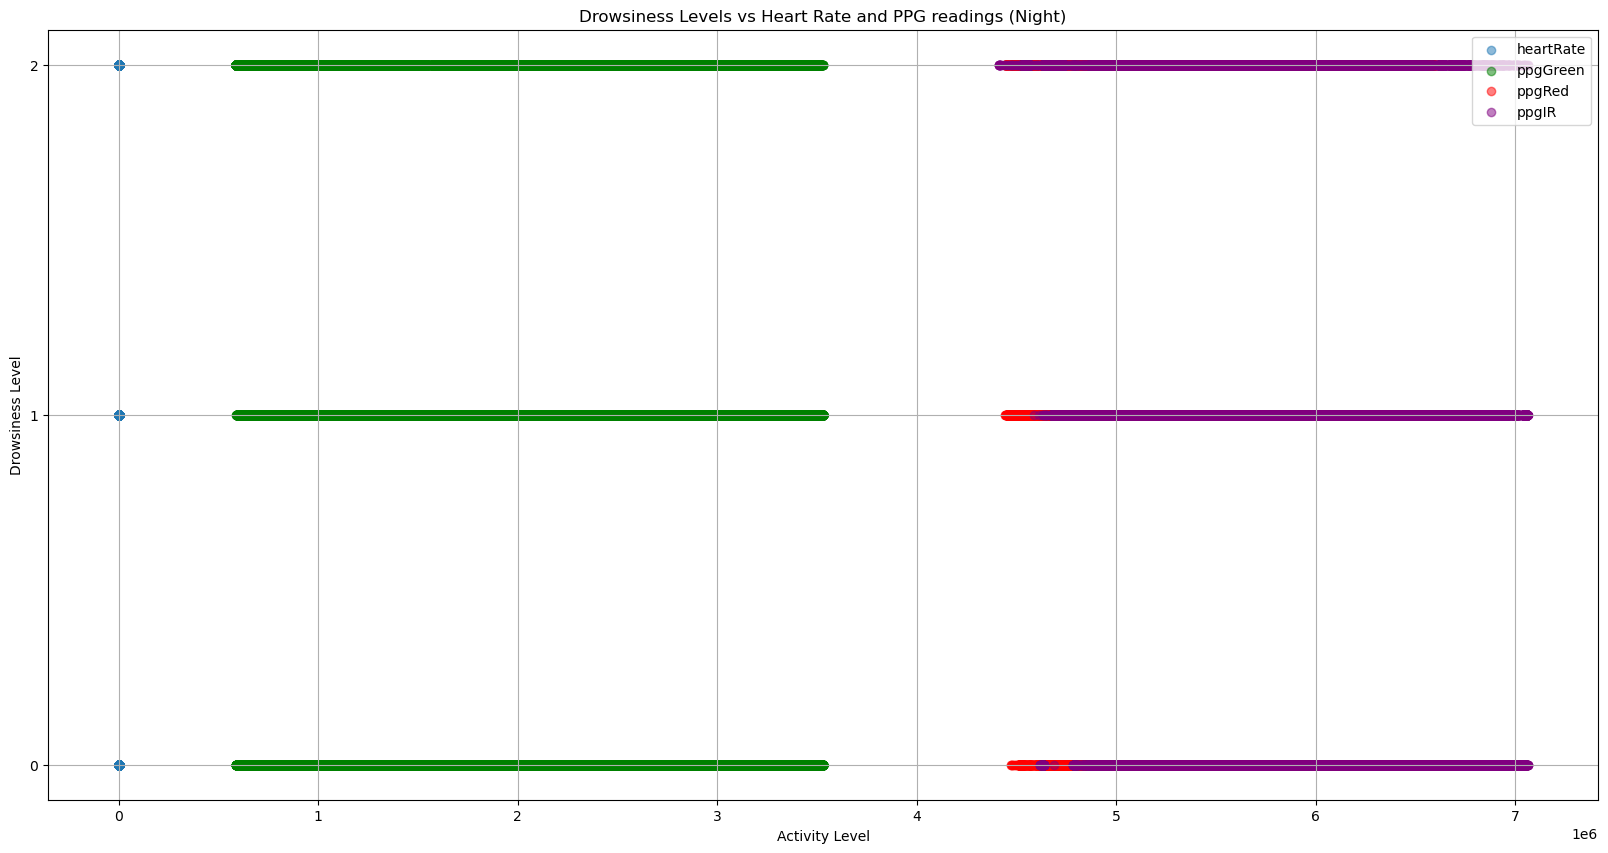

In [36]:
def calculate_and_plot_correlations(data, night_data):
    correlation_heartrate = data['drowsiness'].corr(data['heartRate'])
    correlation_ppgGreen = data['drowsiness'].corr(data['ppgGreen'])
    correlation_ppgRed = data['drowsiness'].corr(data['ppgRed'])
    correlation_ppgIR = data['drowsiness'].corr(data['ppgIR'])

    print(f'Correlation between drowsiness and heart rate ({night_data}): {correlation_heartrate}')
    print(f'Correlation between drowsiness and PPG Green ({night_data}): {correlation_ppgGreen}')
    print(f'Correlation between drowsiness and PPG Red ({night_data}): {correlation_ppgRed}')
    print(f'Correlation between drowsiness and PPG IR ({night_data}): {correlation_ppgIR}')

    plt.figure(figsize = (20,10))
    plt.scatter(data['heartRate'], data['drowsiness'], alpha = 0.5, label = 'heartRate')
    plt.scatter(data['ppgGreen'], data['drowsiness'], alpha = 0.5, label = 'ppgGreen', color = 'green')
    plt.scatter(data['ppgRed'], data['drowsiness'], alpha = 0.5, label = 'ppgRed', color = 'red')
    plt.scatter(data['ppgIR'], data['drowsiness'], alpha = 0.5, label = 'ppgIR', color = 'purple')
    plt.title(f'Drowsiness Levels vs Heart Rate and PPG readings ({night_data})')
    plt.yticks(np.arange(0, 3, step=1))
    plt.xlabel('Activity Level')
    plt.ylabel('Drowsiness Level')
    plt.legend(bbox_to_anchor = (1, 1), loc = 'upper right')
    plt.grid()
    plt.legend()
    plt.show()

calculate_and_plot_correlations(night_data, 'Night')

### Box Plots

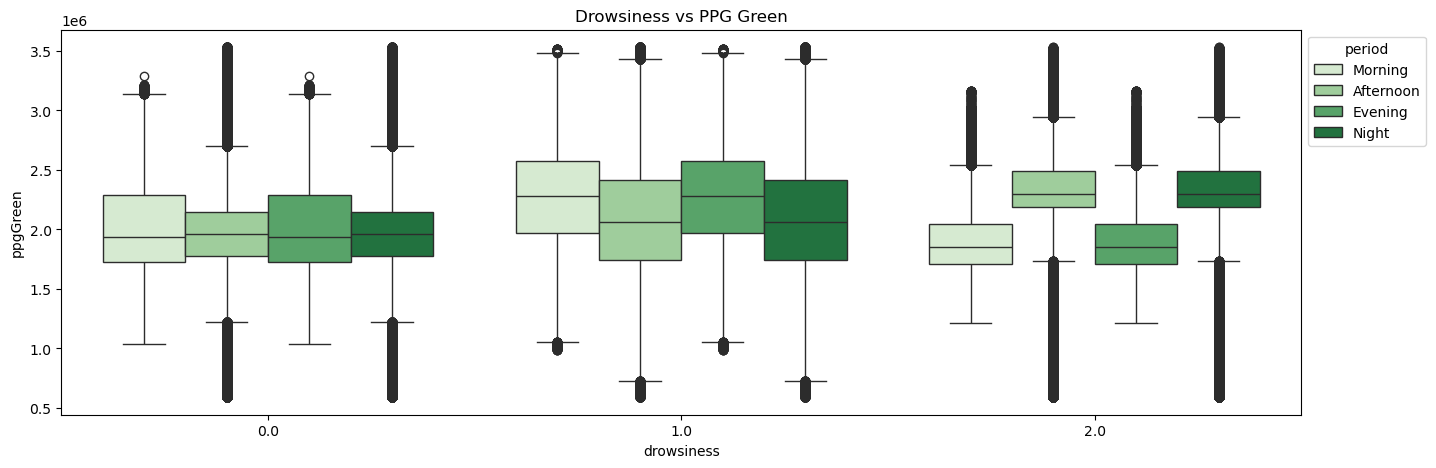

In [82]:
plt.figure(figsize = (16, 5)) 
ax = sns.boxplot(x = 'drowsiness', y = 'ppgGreen', data = data, hue = 'period', palette = 'Greens')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Drowsiness vs PPG Green')
plt.show()

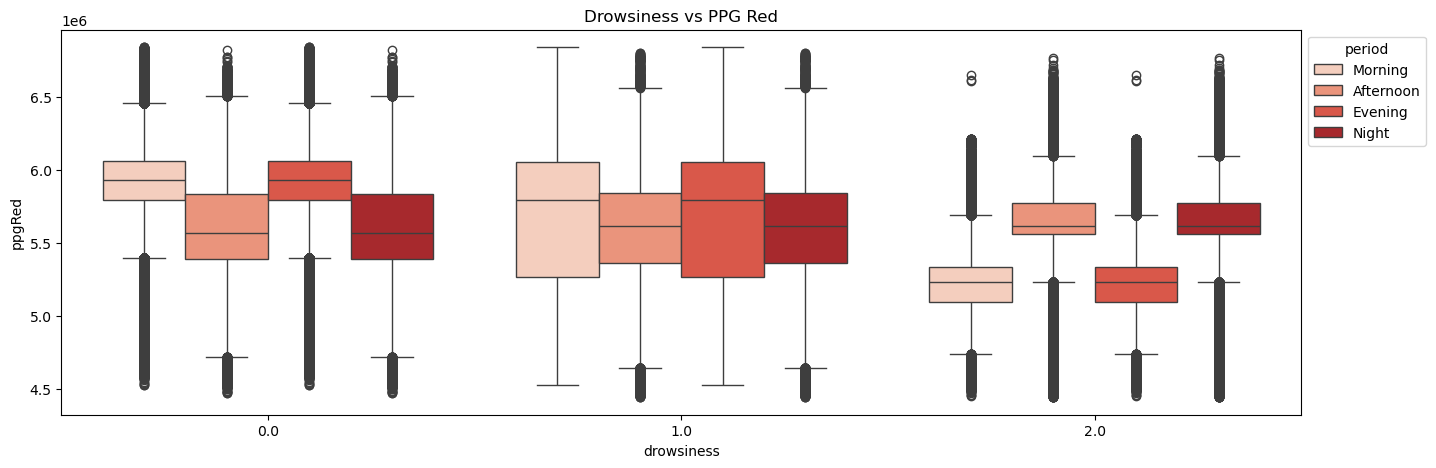

In [80]:
plt.figure(figsize = (16, 5)) 
ax = sns.boxplot(x = 'drowsiness', y = 'ppgRed', data = data, hue = 'period', palette ='Reds')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Drowsiness vs PPG Red')
plt.show()

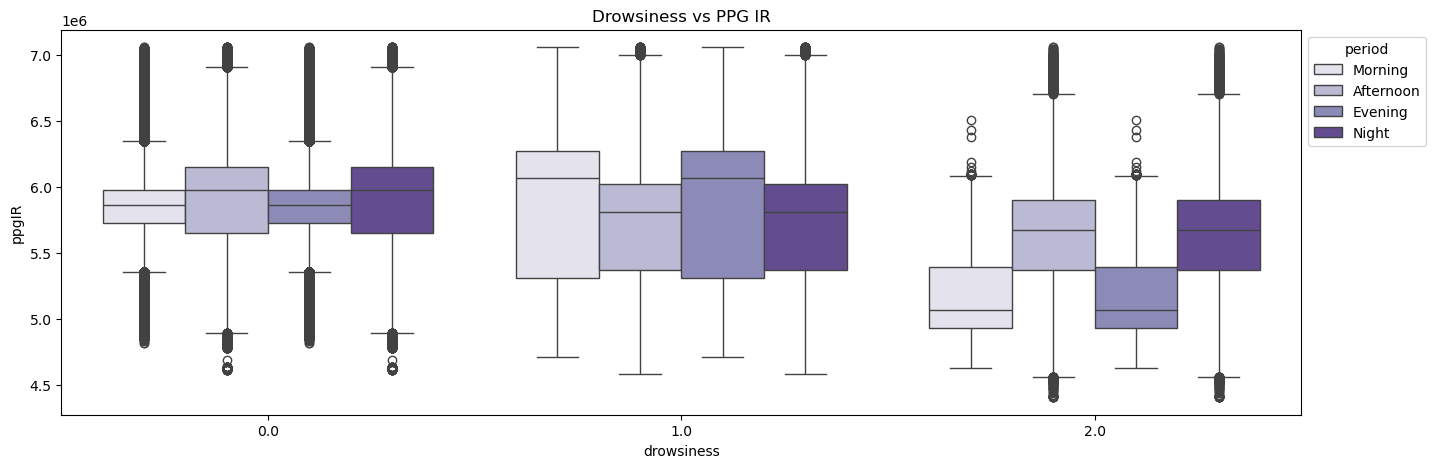

In [79]:
plt.figure(figsize = (16, 5)) 
ax = sns.boxplot(x = 'drowsiness', y = 'ppgIR', data = data, hue = 'period', palette = 'Purples')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Drowsiness vs PPG IR')
plt.show()

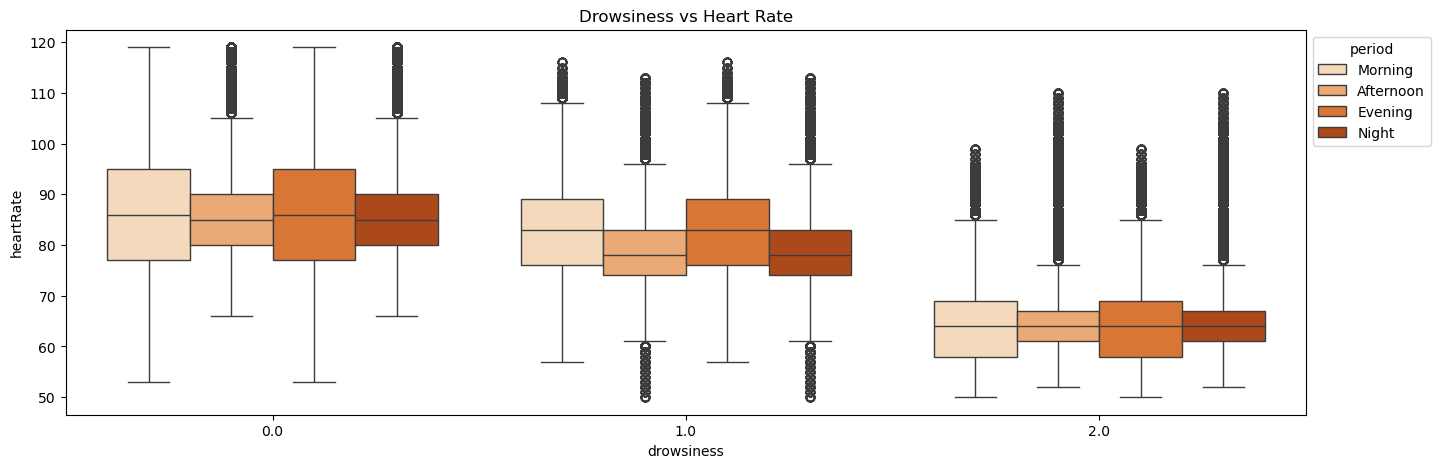

In [77]:
plt.figure(figsize = (16, 5)) 
ax = sns.boxplot(x = 'drowsiness', y = 'heartRate', data = data, hue = 'period', palette = 'Oranges')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Drowsiness vs Heart Rate')
plt.show()

In [ ]:

plt.figure(figsize = (16, 5)) 
sns.lineplot(x = 'drowsiness', y = 'ppgGreen', data = data, hue = 'period', marker = '*')
sns.lineplot(x = 'drowsiness', y = 'ppgRed', data = data, hue = 'period', marker = '*')
sns.lineplot(x = 'drowsiness', y = 'ppgIR', data = data, hue = 'period', marker = '*')
plt.title('Drowsiness vs ppgGreen')
plt.show()